


#Preparación de datos

In [ ]:
#Cargar librerias
import pandas as pd
import numpy as np
import sklearn
import math
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.linalg import inv

In [ ]:
#Cargar datos de csv
df = pd.read_csv(r'Life Expectancy Data.csv')
print(df)
df.info()

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [ ]:
#filtrar dejando sólo variables cuantitativas
df._get_numeric_data()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
#guardar el filtro como nuevo dataframe
df2=df._get_numeric_data()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

##eliminar columnas innecesarias para la matriz X

In [ ]:
df3 = df2.drop('Life expectancy ',axis=1)

In [ ]:
#definir matriz X de variables
X = df3
print(X)

      Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deat

In [ ]:
#definir matriz Y de valores de respuesta
Y = df2[['Life expectancy ']]
print(Y)

      Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[2938 rows x 1 columns]


#Diagramas de dispersión variables



In [ ]:
features=['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

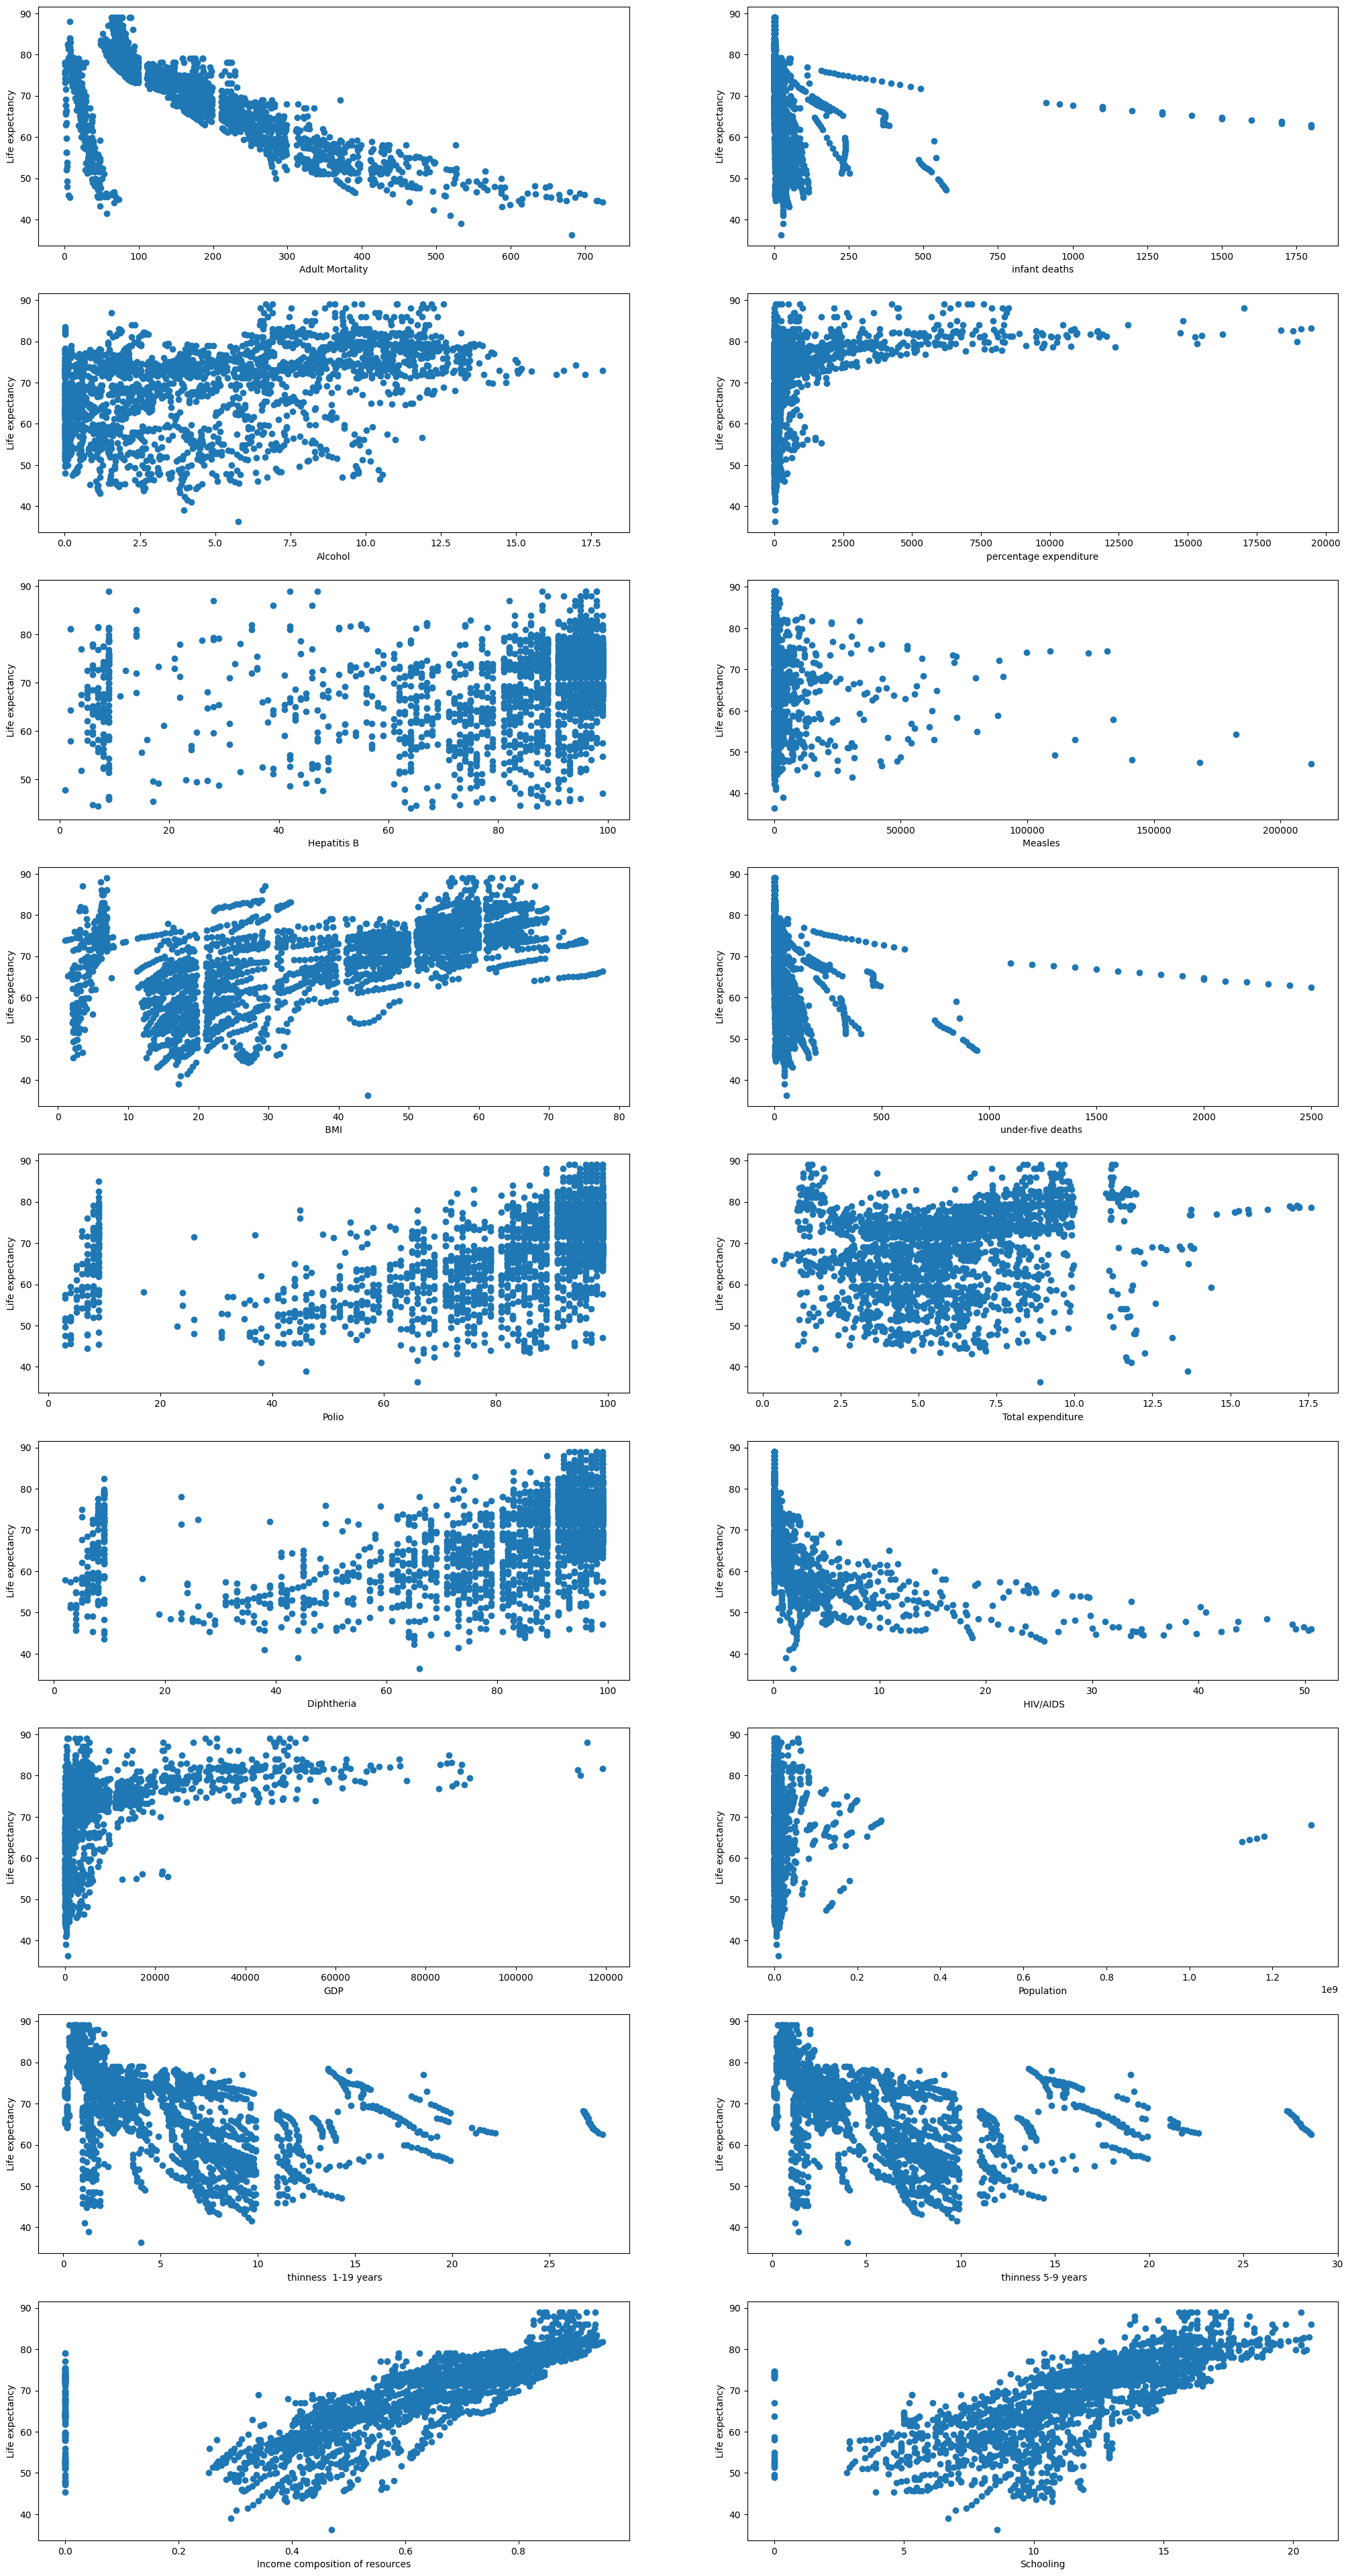

In [ ]:
plt.figure(figsize=(25,50),dpi=100)
for index, feature_name in enumerate(X[features]):
  plt.subplot(9,2,index+1)
  plt.scatter(X[feature_name],df2['Life expectancy '])
  plt.ylabel('Life expectancy',size=10)
  plt.xlabel(feature_name,size=10)

# Matriz de correlaciones

In [ ]:
#2. Evaluar las correlaciones
matriz_corr = df2.corr()
matriz_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


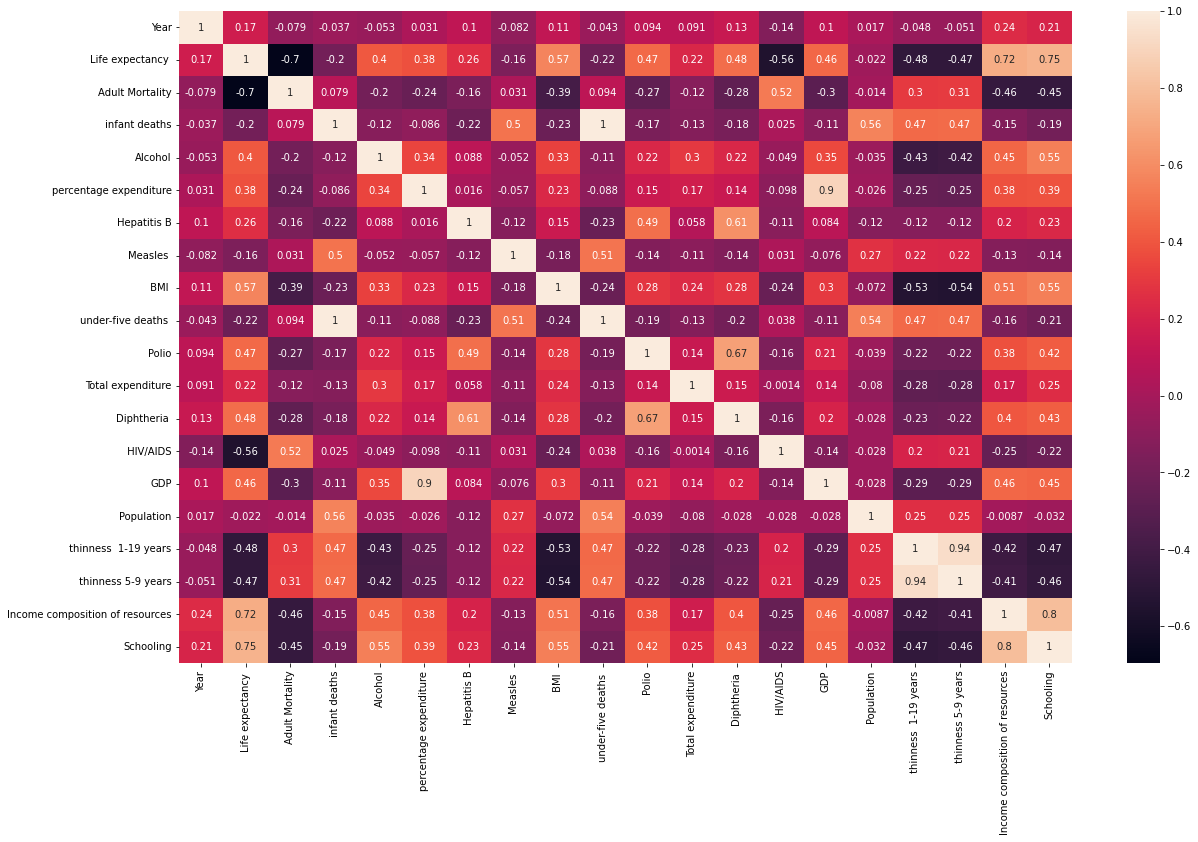

In [ ]:
#Grafica de la matriz de correlaciones
plt.figure(figsize=(20,12))
sns.heatmap(matriz_corr, annot=True);

#Imputación de valores faltantes

In [ ]:
df2.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df2.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
for index, feature_name in enumerate(df2[features]):
	print(df2[feature_name])
	print(df2[feature_name] == 'nulo') #Realizar comparaciones sobre la variable
	print(df2[feature_name] > 4) #Realizar comparaciones sobre la variable
	#Calcular el promedio de la variable
	media_feature= df2[feature_name].mean()
	print(media_feature)
	#Reemplazar los valores faltantes NaN por la media
	df2[feature_name].replace(np.nan, media_feature, inplace = True)
	
#iterar para todas las columnas

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Adult Mortality, Length: 2938, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
2933    True
2934    True
2935    True
2936    True
2937    True
Name: Adult Mortality, Length: 2938, dtype: bool
164.79644808743168
0       62
1       64
2       66
3       69
4       71
        ..
2933    27
2934    26
2935    25
2936    25
2937    24
Name: infant deaths, Length: 2938, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: infant deaths, Length: 2938, dtype: bool
0       Tr

In [ ]:
print(df2.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000

In [ ]:
print(df2['Hepatitis B'])
print(df2['Hepatitis B'] == 'nulo') #Realizar comparaciones sobre la variable
print(df2[feature_name] > 4) #Realizar comparaciones sobre la variable
#Calcular el promedio de la variable
media_feature= df2['Hepatitis B'].mean()
print(media_feature)
#Reemplazar los valores faltantes NaN por la media
df2['Hepatitis B'].replace(np.nan, media_feature, inplace = True)
print(df2.describe())

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    68.0
2934     7.0
2935    73.0
2936    76.0
2937    79.0
Name: Hepatitis B, Length: 2938, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Hepatitis B, Length: 2938, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
2933    True
2934    True
2935    True
2936    True
2937    True
Name: Schooling, Length: 2938, dtype: bool
80.94046121593291
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74

In [ ]:
print(df2[' BMI '])

print(df2[' BMI '] == ' BMI ') #Realizar comparaciones sobre la variable
print(df2[feature_name] > 4) #Realizar comparaciones sobre la variable

#Calcular el promedio de la variable
media_feature= df2[' BMI '].mean()
print(media_feature)

#Reemplazar los valores faltantes NaN por la media
df2[' BMI '].replace(np.nan, media_feature, inplace = True)
print(df2.describe())

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name:  BMI , Length: 2938, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name:  BMI , Length: 2938, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
2933    True
2934    True
2935    True
2936    True
2937    True
Name: Schooling, Length: 2938, dtype: bool
38.321246556473824
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000    

In [ ]:
print(df2['GDP'])

print(df2['GDP'] == 'nulo') #Realizar comparaciones sobre la variable
print(df2[feature_name] > 4) #Realizar comparaciones sobre la variable

#Calcular el promedio de la variable
media_feature= df2['GDP'].mean()
print(media_feature)

#Reemplazar los valores faltantes NaN por la media
df2['GDP'].replace(np.nan, media_feature, inplace = True)
print(df2.describe())

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2938, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: GDP, Length: 2938, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
2933    True
2934    True
2935    True
2936    True
2937    True
Name: Schooling, Length: 2938, dtype: bool
7483.158469138474
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000

In [ ]:
print(df2['Life expectancy '])

print(df2['Life expectancy '] == 'Life expectancy ') #Realizar comparaciones sobre la variable
print(df2[feature_name] > 4) #Realizar comparaciones sobre la variable

#Calcular el promedio de la variable
media_feature= df2['Life expectancy '].mean()
print(media_feature)

#Reemplazar los valores faltantes NaN por la media
df2['Life expectancy '].replace(np.nan, media_feature, inplace = True)
print(df2.describe())

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Life expectancy , Length: 2938, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
2933    True
2934    True
2935    True
2936    True
2937    True
Name: Schooling, Length: 2938, dtype: bool
69.22493169398908
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.507640       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000

In [ ]:
df2.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#Significancia de atributos

In [ ]:
#Ajuste de modelo con statsmodels
import statsmodels.formula.api as smf     # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import statsmodels.api as sm              # Este proporciona funciones para la estimación de muchos modelos estadísticos


In [ ]:
df3 = df2.drop('Life expectancy ',axis=1)

In [ ]:
X = df3

In [ ]:
Y = df2[['Life expectancy ']]

In [ ]:
data_num=df2

In [ ]:
X = sm.add_constant(X) 

## Identificar las variables significativas del modelo (método por MCO)

### Opciòn 1

In [ ]:
#Variables predictoras mas significativas dentro del modelo con una significancia de 0.05
model= sm.OLS(Y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = model.predict(X)

In [ ]:
model.summary()                         # Imprime las estadísticas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     688.5
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:26:04   Log-Likelihood:                -8285.3
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2918   BIC:                         1.673e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              87.8135     34.836      2.521      0.012      19.508     156.119
Year                               -0.0166      0.017     -0.955      0.340      -0.051       0.018
Adult Mortality                    -0.0203      0.001    -25.428      0.000      -0.022      -0.019
infant deaths                       0.0993      0.008     11.716      0.000       0.083       0.116
Alcohol                             0.1174      0.024      4.802      0.000       0.069       0.165
percentage expenditure              0.0001   8.49e-05      1.490      0.136      -4e-05       0.000
Hepatitis B                        -0.0140      0.004     -3.560      0.000      -0.022      -0.006
Measles                         -2.085e-05    7.7e-06     -2.707      0.007    -3.6e-05   -5.75e-06
 BMI                                0.0434      0.005      8.750      0.000       0.034       0.053
under-five deaths                  -0.0742      0.006    -11.944      0.000      -0.086      -0.062
Polio                               0.0286      0.004      6.366      0.000       0.020       0.037
Total expenditure                   0.0926      0.034      2.712      0.007       0.026       0.160
Diphtheria                          0.0399      0.005      8.418      0.000       0.031       0.049
 HIV/AIDS                          -0.4734      0.018    -26.668      0.000      -0.508      -0.439
GDP                              3.773e-05   1.31e-05      2.886      0.004    1.21e-05    6.34e-05
Population                        7.79e-11    1.7e-09      0.046      0.963   -3.26e-09    3.41e-09
 thinness  1-19 years              -0.0824      0.051     -1.625      0.104      -0.182       0.017
 thinness 5-9 years                 0.0005      0.050      0.009      0.993      -0.097       0.098
Income composition of resources     6.0744      0.643      9.448      0.000       4.814       7.335
Schooling                           0.6729      0.042     16.003      0.000       0.590       0.755
==============================================================================
Omnibus:                      137.800   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.189
Skew:                          -0.175   Prob(JB):                     2.31e-89
Kurtosis:                       4.792   Cond. No.                     2.56e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SK-LEARN lib (significative variables)

Puntaje Entrenamiento: 0.7365781661030986
Adult Mortality                   -0.031029
 BMI                               0.074113
Schooling                          0.906772
Income composition of resources    9.803538
dtype: float64
ECM: 25.25100408028201
RECM: 5.025037719289479
EAM: 3.5833004375304514
R^2: 0.7044148317068841


Text(0, 0.5, 'Recuento')

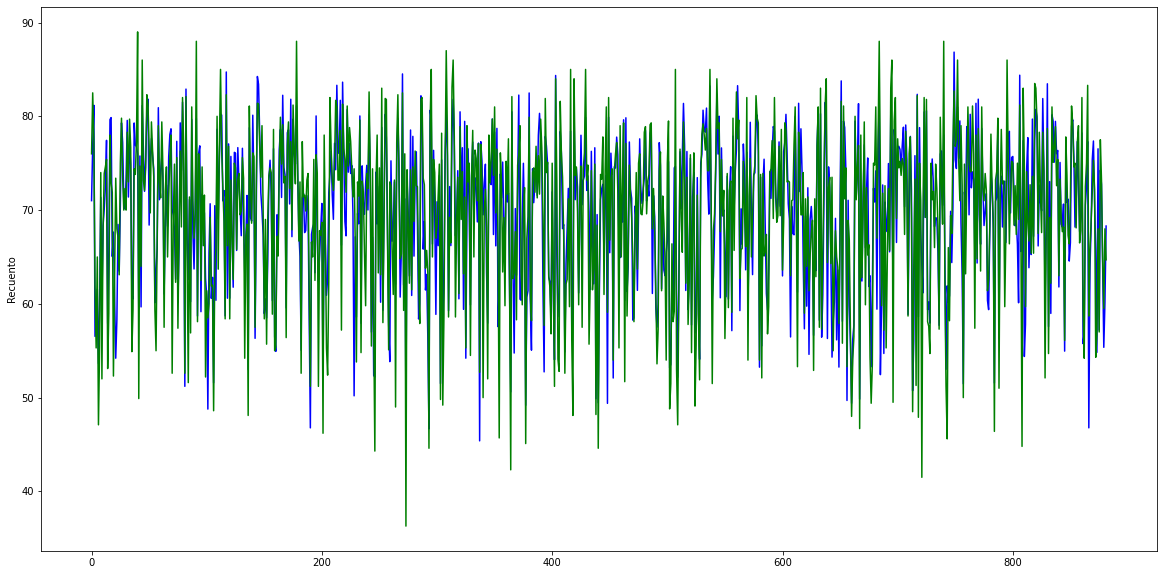

In [ ]:
# Importar los métodos necesarios
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

# Definir el dataframe de variables predictoras y variable respuesta
df4 = df2[['Life expectancy ', 'Schooling','Income composition of resources','Adult Mortality',' BMI ']]
X = df4.drop(labels=["Life expectancy "], axis=1)
Y = df4['Life expectancy ']

# Definir datos de entrenamiento y datos de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Ajustar el modelo con datos de entrenamiento
linear_model = LinearRegression().fit(x_train, y_train)

# Puntaje de entrenamiento
print('Puntaje Entrenamiento:', linear_model.score(x_train, y_train))

# Ajuste de parámetros
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

# Hacer predicciones con los datos de prueba
y_pred = linear_model.predict(x_test)

# Cálculo de errores
ecm = mean_squared_error(y_test, y_pred)
recm = math.sqrt(ecm)
eam = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('ECM:', ecm)
print('RECM:', recm)
print('EAM:', eam)
print('R^2:', r2)

# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y_test.values, label='Real', color='green')
plt.ylabel('Recuento')


# MCO (significative variables)

Coeficientes de regresión:  [[ 5.56543588e+01]
 [ 7.29262005e-02]
 [ 9.14382138e+00]
 [ 8.64613052e-01]
 [-3.23513648e-02]]
Puntaje Entrenamiento: 0.7301667385835785
ECM: 25.761850044510147
RECM: 5.075613267823914
EAM: 3.5245317466777704
R^2: 0.722719194921104


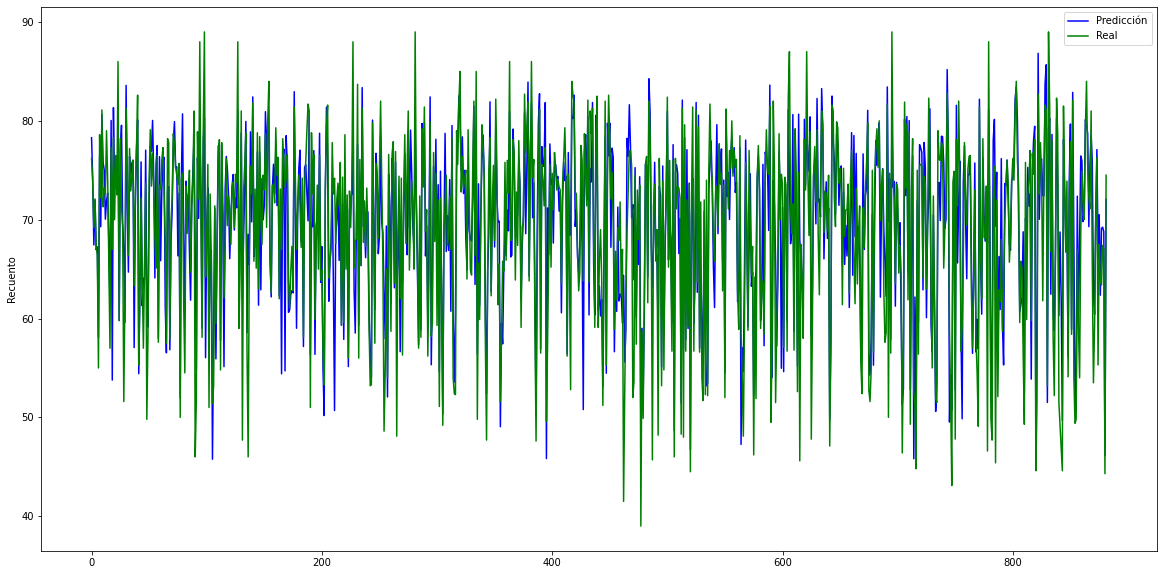

In [ ]:
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Seleccionar las variables independientes y la variable dependiente
X = data_num[[' BMI ','Income composition of resources','Schooling', 'Adult Mortality']]
Y = df[['Life expectancy ']]

# Preparar la matriz X
X0 = np.ones((len(X),1))
Xmat = X.values
Xnew = np.hstack((X0, Xmat))

# Calcular los coeficientes de regresión utilizando el método de MCO
Beta = inv(Xnew.T @ Xnew) @ Xnew.T @ Y.values
print('Coeficientes de regresión: ', Beta)

# Hacer predicciones con los datos de prueba
y_pred = Xnew @ Beta

# Definir datos de entrenamiento y datos de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(Xnew, Y, test_size=0.3)

# Ajustar el modelo con datos de entrenamiento
linear_model = LinearRegression().fit(x_train, y_train)

# Puntaje de entrenamiento
print('Puntaje Entrenamiento:', linear_model.score(x_train, y_train))

# Hacer predicciones con los datos de prueba
y_pred = linear_model.predict(x_test)

# Cálculo de errores
ecm = mean_squared_error(y_test, y_pred)
recm = np.sqrt(ecm)
eam = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#nuevo error
print('ECM:', ecm)
print('RECM:', recm)
print('EAM:', eam)
print('R^2:', r2)

# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y_test.values, label='Real', color='green')
plt.ylabel('Recuento')
plt.legend()



# GD (all)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [ ]:
df2.rename(columns = {' BMI ' :'BMI',
  'Life expectancy ': 'Life_expectancy',
  'Adult Mortality':'Adult_mortality',
  'infant deaths':'Infant_deaths',
  'percentage expenditure':'Percentage_expenditure',
  'Hepatitis B':'HepatitisB',
  'Measles ':'Measles',
  'under-five deaths ': 'Under_five_deaths',
  'Total expenditure':'Total_expenditure',
  'Diphtheria ': 'Diphtheria',
  ' thinness 1–19 years':'Thinness_1–19_years',
  ' thinness 5–9 years':'Thinness_5–9_years',
  ' HIV/AIDS':'HIV/AIDS',
  'Income composition of resources':
  'Income_composition_of_resources'}, inplace = True)


In [ ]:
# extract Y and drop from data frame
Y = df2['Life_expectancy']
df = df2.drop(['Life_expectancy'], axis=1)

In [ ]:
X = df.to_numpy() 
y = Y.to_numpy().transpose() 
m,n = X.shape


In [ ]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma


In [ ]:
xo = np.hstack((np.ones((m, 1)), xn))

In [ ]:
repeat = 1000
lrate = 0.01
theta = np.zeros((n+1))

In [ ]:
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

In [ ]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [ 6.92219432e+01 -1.03456621e-01 -2.57033202e+00  2.53736719e-01
  3.20423126e-01  2.84010992e-01 -3.74096645e-01 -3.06417674e-01
  8.88067046e-01 -4.84246832e-01  7.51209095e-01  2.40072896e-01
  1.08940276e+00 -2.46054723e+00  4.11020179e-01  1.64326670e-01
 -2.77276895e-01 -7.24309620e-03  1.45462367e+00  2.17788627e+00] 


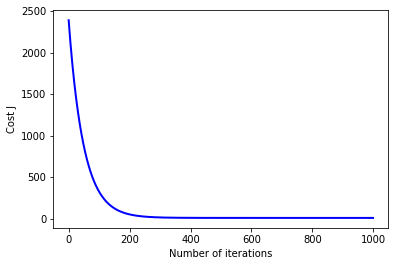

In [ ]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
y_pred = np.matmul(xo, theta)

In [ ]:
# get R2 and error rate

print('R^2:',(metrics.r2_score(y, y_pred)))
print('MSE:', (metrics.mean_squared_error(y, y_pred)))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('MAE:', (metrics.mean_absolute_error(y, y_pred)))

# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

In [ ]:
# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y, label='Real', color='green')
plt.ylabel('Expectativa de vida')
plt.legend()

# GD (significative variables)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [ ]:
df2.rename(columns = {' BMI ' :'BMI',
  'Life expectancy ': 'Life_expectancy',
  'Adult Mortality':'Adult_mortality',
  'infant deaths':'Infant_deaths',
  'percentage expenditure':'Percentage_expenditure',
  'Hepatitis B':'HepatitisB',
  'Measles ':'Measles',
  'under-five deaths ': 'Under_five_deaths',
  'Total expenditure':'Total_expenditure',
  'Diphtheria ': 'Diphtheria',
  ' thinness 1–19 years':'Thinness_1–19_years',
  ' thinness 5–9 years':'Thinness_5–9_years',
  ' HIV/AIDS':'HIV/AIDS',
  'Income composition of resources':
  'Income_composition_of_resources'}, inplace = True)


In [ ]:
# extract Y and drop from data frame
Y = df2['Life_expectancy']
df = df2[['BMI','Income_composition_of_resources','Schooling', 'Adult_mortality']]

In [ ]:
X = df.to_numpy() 
y = Y.to_numpy().transpose() 
m,n = X.shape


In [ ]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma


In [ ]:
xo = np.hstack((np.ones((m, 1)), xn))

In [ ]:
repeat = 1000
lrate = 0.01
theta = np.zeros((n+1))

In [ ]:
def computeCost(X, y, theta):
  m = len(y) # number of training examples
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff)
  return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
  # Initialize some useful values
  m = len(y) # number of training examples
  J_history = []
  # repeat until convergance
  for i in range(num_iters):
    hc = np.matmul(X, theta) - y
    theta -= alpha / m * np.matmul(X.transpose(), hc)
    # Save the cost J in every iteration
    J_history.append(computeCost(X, y, theta))
  return theta, J_history

In [ ]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)
# Display gradient descent's result
print('Best theta computed from gradient descent: ')
print(f' {theta} ')

Best theta computed from gradient descent: 
 [69.22194317  1.45923306  1.93766108  2.75536361 -4.00935942] 


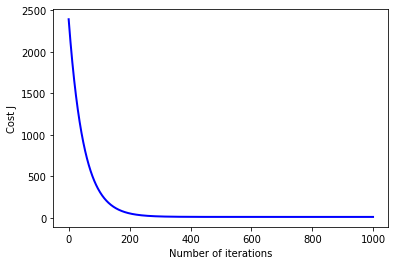

In [ ]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
y_pred = np.matmul(xo, theta)

In [ ]:
# get R2 and error rate

print('R^2:',(metrics.r2_score(y, y_pred)))
print('MSE:', (metrics.mean_squared_error(y, y_pred)))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('MAE:', (metrics.mean_absolute_error(y, y_pred)))

# calculate our own accuracy where prediction within 10% is o
diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

R^2: 0.7281492331168173
MSE: 24.565645576135186
RMSE:  4.9563742368928505
MAE: 3.462946197402337
Mean of results:  100.61435359680576
Deviation of results:  8.338679492500821
Results within 10% support/resistance:  86.07896528250511


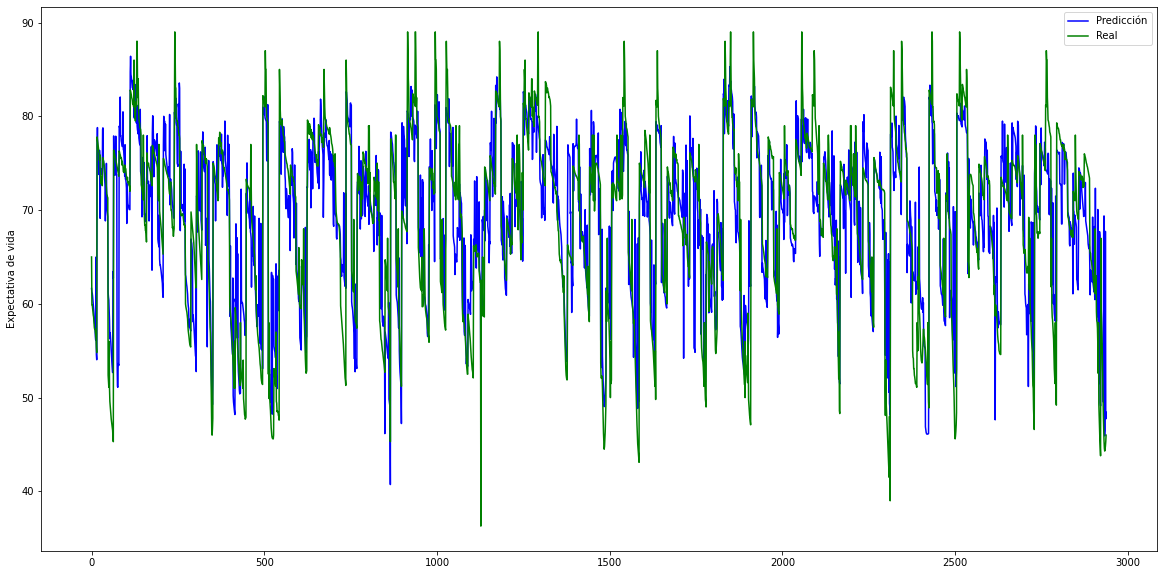

In [ ]:
# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y, label='Real', color='green')
plt.ylabel('Expectativa de vida')
plt.legend()

#Método por árboles de desición (all)

R^2: 0.9151934073751893
MSE: 7.925274091442795
RMSE: 2.8151863333432825
MAE: 1.6425166970248941


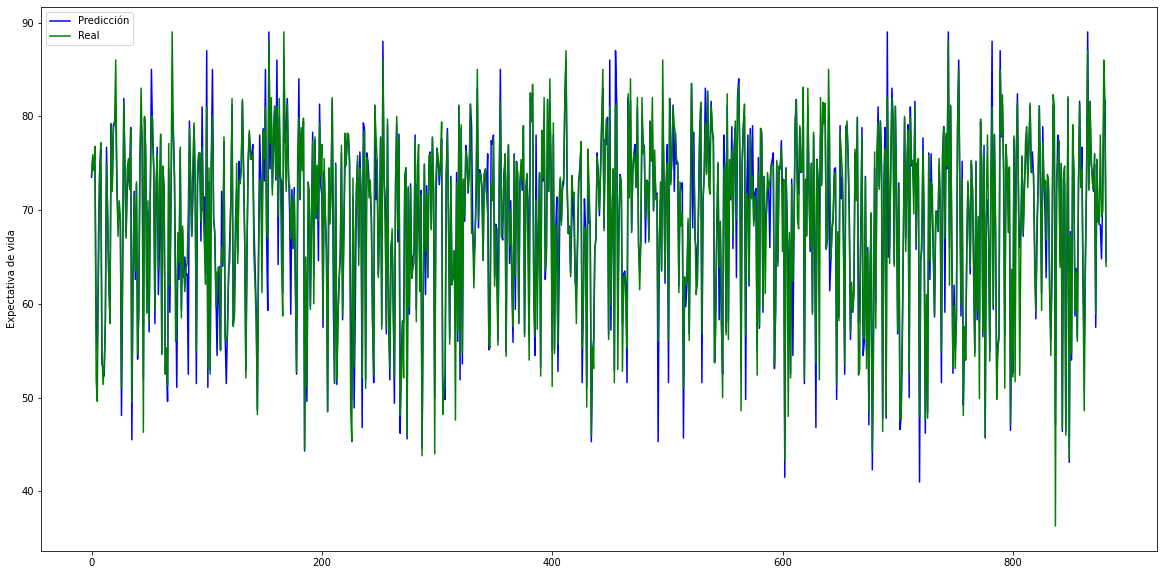

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = df2.copy()   
# Seleccionar las variables independientes y la variable dependiente
X = data.drop(['Life_expectancy'], axis=1)
Y = data['Life_expectancy']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir métricas de evaluación del modelo
print('R^2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y_test.values, label='Real', color='green')
plt.ylabel('Expectativa de vida')
plt.legend()


#Método por árboles de desición (s.v)

R^2: 0.9044095273346588
MSE: 8.933040144119225
RMSE: 2.988819188930509
MAE: 1.801814058956916


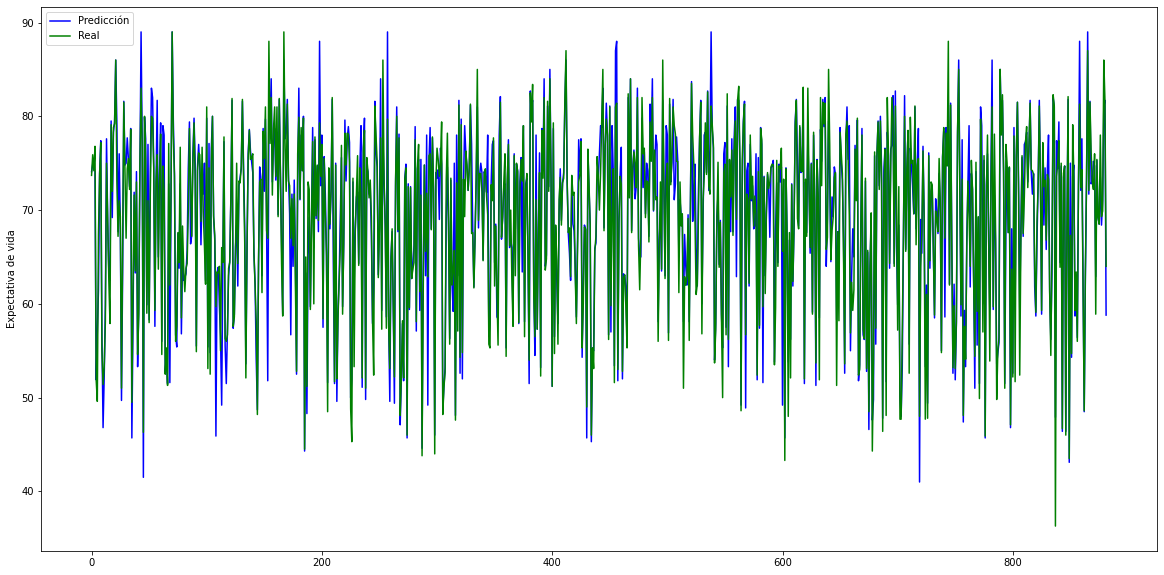

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = df2.copy()   
# Seleccionar las variables independientes y la variable dependiente
X = data[['BMI','Income_composition_of_resources','Schooling', 'Adult_mortality']]
Y = data['Life_expectancy']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir métricas de evaluación del modelo
print('R^2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

# Gráfico de predicción
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='Predicción', color='blue')
plt.plot(y_test.values, label='Real', color='green')
plt.ylabel('Expectativa de vida')
plt.legend()


# Comparación métricas evaluación gráficamente

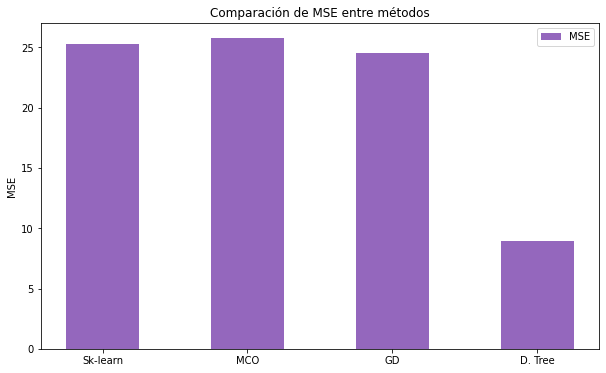

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la tabla
metodos = ['Sk-learn', 'MCO', 'GD', 'D. Tree']
mse = [25.25, 25.76, 24.56, 8.93]


# Crear el gráfico de barras
x = np.arange(len(metodos))
width = 0.5
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, mse, width, label='MSE', color = 'tab:purple')

# Añadir etiquetas y títulos
ax.set_ylabel('MSE')
ax.set_title('Comparación de MSE entre métodos')
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend()

# Mostrar el gráfico
plt.show()


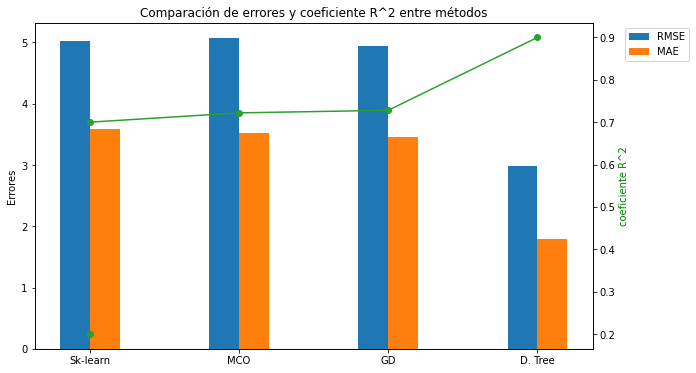

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la tabla
metodos = ['Sk-learn', 'MCO', 'GD', 'D. Tree']

rmse = [5.02, 5.07, 4.95, 2.98]
mae = [3.58, 3.52, 3.46, 1.80]
r2 = [0.70, 0.722, 0.728, 0.90]

# Crear el gráfico de barras
x = np.arange(len(metodos))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))


rects2 = ax.bar(x - 0.5*width, rmse, width, label='RMSE')
rects3 = ax.bar(x + 0.5*width, mae, width, label='MAE')
ax.set_ylabel('Errores')


twin_ax = ax.twinx() 
rects4 = twin_ax.plot(x, r2, width, label='R^2', color = 'tab:green',  marker = 'o')
twin_ax.set_ylabel('coeficiente R^2', color='green')


# Añadir etiquetas y títulos
#ax.set_ylabel('Error')
ax.set_title('Comparación de errores y coeficiente R^2 entre métodos')
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Mostrar el gráfico
plt.show()
